In [ ]:
#predict wages, overall
#classify position based on stats
#compare countries?
#best way to group positions based on skill

In [1]:
#Import all the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
#Read in data

fifa = pd.read_csv('data.csv')

In [3]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
#Cleans up column headers to replace spaces with underscore and make all text lowercase

fifa.columns = fifa.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
#Allows jupyter to show all columns/rows I'll need to see without truncating 

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [6]:
fifa.head()

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
fifa.shape

(18207, 89)

In [8]:
#Looking for null values

fifa.isnull().sum()

unnamed:_0                      0
id                              0
name                            0
age                             0
photo                           0
nationality                     0
flag                            0
overall                         0
potential                       0
club                          241
club_logo                       0
value                           0
wage                            0
special                         0
preferred_foot                 48
international_reputation       48
weak_foot                      48
skill_moves                    48
work_rate                      48
body_type                      48
real_face                      48
position                       60
jersey_number                  60
joined                       1553
loaned_from                 16943
contract_valid_until          289
height                         48
weight                         48
ls                           2085
st            

In [9]:
nulls = fifa[fifa['ls'].isnull()]

In [10]:
#Goalkeepers seem to be the culprite behind most N/A's. Let's split them into their own dataframe

nulls.position.value_counts()

GK    2025
Name: position, dtype: int64

In [11]:
nulls.shape

(2085, 89)

In [12]:
keepers = fifa.loc[fifa['position'] == 'GK']

In [13]:
keepers.shape

(2025, 89)

In [14]:
keepers.head()

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,€68M,€94K,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 16, 2014",NaN,2021,6'2,192lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€58M,€240K,1328,Right,3.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,22.0,"Jul 1, 2014",NaN,2022,6'2,187lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€53.5M,€240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,"Aug 9, 2018",NaN,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,€38M,€130K,1473,Right,5.0,4.0,1.0,Medium/ Medium,Normal,Yes,GK,1.0,"Jul 1, 2011",NaN,2021,6'4,203lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M


In [15]:
keepers.isnull().sum()

unnamed:_0                     0
id                             0
name                           0
age                            0
photo                          0
nationality                    0
flag                           0
overall                        0
potential                      0
club                          33
club_logo                      0
value                          0
wage                           0
special                        0
preferred_foot                 0
international_reputation       0
weak_foot                      0
skill_moves                    0
work_rate                      0
body_type                      0
real_face                      0
position                       0
jersey_number                  0
joined                       122
loaned_from                 1936
contract_valid_until          33
height                         0
weight                         0
ls                          2025
st                          2025
rs        

In [16]:
#New dataframe for all non-GK players

players = fifa.loc[fifa['position'] != 'GK']

In [17]:
players.position.value_counts()

ST     2152
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: position, dtype: int64

In [18]:
#Still some nulls but not a huge amount. Will have to explore more.

players.isnull().sum()

unnamed:_0                      0
id                              0
name                            0
age                             0
photo                           0
nationality                     0
flag                            0
overall                         0
potential                       0
club                          208
club_logo                       0
value                           0
wage                            0
special                         0
preferred_foot                 48
international_reputation       48
weak_foot                      48
skill_moves                    48
work_rate                      48
body_type                      48
real_face                      48
position                       60
jersey_number                  60
joined                       1431
loaned_from                 15007
contract_valid_until          256
height                         48
weight                         48
ls                             60
st            

In [19]:
more_nulls = players[players['ls'].isnull()]

In [20]:
more_nulls.isnull().sum()

unnamed:_0                   0
id                           0
name                         0
age                          0
photo                        0
nationality                  0
flag                         0
overall                      0
potential                    0
club                        12
club_logo                    0
value                        0
wage                         0
special                      0
preferred_foot              48
international_reputation    48
weak_foot                   48
skill_moves                 48
work_rate                   48
body_type                   48
real_face                   48
position                    60
jersey_number               60
joined                      60
loaned_from                 60
contract_valid_until        60
height                      48
weight                      48
ls                          60
st                          60
rs                          60
lw                          60
lf      

In [21]:
players = players.dropna(subset=['ls'])

In [22]:
players.isnull().sum()

unnamed:_0                      0
id                              0
name                            0
age                             0
photo                           0
nationality                     0
flag                            0
overall                         0
potential                       0
club                          196
club_logo                       0
value                           0
wage                            0
special                         0
preferred_foot                  0
international_reputation        0
weak_foot                       0
skill_moves                     0
work_rate                       0
body_type                       0
real_face                       0
position                        0
jersey_number                   0
joined                       1371
loaned_from                 14947
contract_valid_until          196
height                          0
weight                          0
ls                              0
st            

In [23]:
players.shape

(16122, 89)

In [24]:
players.describe()

,unnamed:_0,id,age,overall,potential,special,international_reputation,weak_foot,skill_moves,jersey_number,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,8933.010296,215083.994294,25.005272,66.461233,71.515631,1667.311066,1.115494,3.004590,2.532502,19.424203,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,51.254497,46.433445,56.101786,63.201216,67.915333,67.993735,66.427863,62.204999,66.585163,59.601600,66.019601,67.336373,65.910929,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723,10.499070,10.556445,10.550118,10.529215,10.508436
std,5200.601520,28582.147476,4.547106,6.794631,6.074413,196.456304,0.396542,0.636915,0.617823,15.595258,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,15.145165,15.070673,12.388396,10.013325,11.744513,11.464128,12.343648,8.767710,12.168537,13.228839,11.532420,11.181344,12.597878,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624,3.095231,3.073416,3.140666,3.079219,3.100045
min,0.000000,16.000000,16.000000,46.000000,48.000000,1000.000000,1.000000,1.000000,2.000000,2.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,11.000000,10.000000,19.000000,25.000000,20.000000,25.000000,23.000000,21.000000,22.000000,14.000000,28.000000,27.000000,25.000000,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4430.250000,200917.250000,21.000000,62.000000,67.000000,1526.000000,1.000000,3.000000,2.000000,9.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,39.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,59.000000,61.000000,59.000000,40.000000,50.000000,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,8869.500000,222027.500000,25.000000,66.000000,71.000000,1670.000000,1.000000,3.000000,2.000000,17.000000,56.000000,52.000000,58.000000,64.000000,47.000000,63.000000,52.000000,44.000000,58.000000,64.000000,69.000000,69.000000,68.000000,62.000000,68.000000,61.000000,67.000000,68.000000,67.000000,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000,10.000000,11.000000,11.000000,10.500000,10.000000
75%,13407.750000,236638.250000,28.000000,71.000000,75.000000,1805.750000,1.000000,3.000000,3.000000,26.000000,65.000000,63.000000,65.000000,69.000000,58.000000,69.000000,63.000000,58.000000,65.000000,70.000000,76.000000,76.000000,75.000000,68.000000,75.000000,69.000000,74.000000,75.000000,75.000000,64.000000,70.000000,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,18206.000000,246620.000000,41.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97

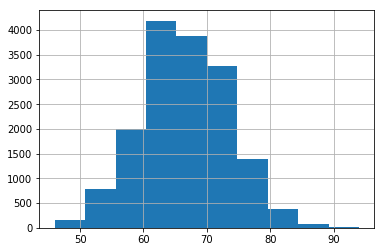

In [25]:
players.overall.hist()

In [26]:
keepers.position.value_counts()

GK    2025
Name: position, dtype: int64

In [27]:
keepers.describe()

,unnamed:_0,id,age,overall,potential,special,international_reputation,weak_foot,skill_moves,jersey_number,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.0,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,10333.056296,207877.391111,26.043457,64.603457,69.799012,1046.204938,1.095802,2.489877,1.0,20.516543,14.257284,12.016296,14.368889,27.269136,12.397037,13.856296,14.707654,14.464198,25.808395,19.949630,38.320000,38.712099,40.201481,58.926420,43.098272,22.533333,57.698272,30.461728,60.602963,12.653333,26.371852,17.052346,11.258765,36.997531,20.007407,45.122469,15.225185,14.141235,14.072099,65.323951,62.868148,61.477531,63.047407,66.101728
std,5540.048848,38728.503360,5.465042,7.596630,6.374247,131.561198,0.374202,0.666847,0.0,18.492143,3.977764,3.992734,3.933956,7.840124,4.293505,4.300082,4.454254,4.682807,8.219015,5.888912,11.016396,10.757963,11.428152,10.302635,11.037831,6.934690,11.498553,7.817688,11.113295,4.336548,7.835103,5.999854,4.181552,12.764417,6.845878,12.093992,5.633895,3.425204,3.447909,7.768497,7.486476,7.626315,8.671413,8.213524
min,3.000000,1179.000000,16.000000,47.000000,48.000000,731.000000,1.000000,1.000000,1.0,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,30.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,45.000000,43.000000,35.000000,38.000000,44.000000
25%,5703.000000,191827.000000,22.000000,59.000000,65.000000,949.000000,1.000000,2.000000,1.0,1.000000,12.000000,9.000000,12.000000,22.000000,9.000000,11.000000,12.000000,12.000000,20.000000,16.000000,30.000000,31.000000,32.000000,52.000000,35.000000,19.000000,52.000000,24.000000,54.000000,9.000000,20.000000,12.000000,8.000000,28.000000,15.000000,36.000000,11.000000,12.000000,12.000000,60.000000,58.000000,56.000000,57.000000,60.000000
50%,10974.000000,216540.000000,25.000000,64.000000,69.000000,1060.000000,1.000000,3.000000,1.0,21.000000,13.000000,12.000000,14.000000,27.000000,12.000000,13.000000,14.000000,13.000000,24.000000,20.000000,39.000000,40.000000,38.000000,60.000000,43.000000,22.000000,59.000000,30.000000,62.000000,13.000000,25.000000,17.000000,11.000000,36.000000,20.000000,46.000000,14.000000,14.000000,13.000000,65.000000,63.000000,61.000000,63.000000,66.000000
75%,15491.000000,235155.000000,30.000000,69.000000,74.000000,1138.000000,1.000000,3.000000,1.0,30.000000,16.000000,15.000000,16.000000,31.000000,15.000000,16.000000,17.000000,16.000000,31.000000,23.000000,46.000000,46.000000,48.000000,67.000000,51.000000,24.000000,66.000000,36.000000,68.000000,16.000000,32.000000,22.000000,14.000000,45.000000,23.000000,55.000000,19.000000,16.000000,16.000000,70.000000,68.000000,66.000000,69.000000,72.000000
max,18198.000000,246603.000000,45.000000,91.000000,93.000000,1473.000000,5.000000,5.000000,1.0,99.000000,45.000000,27.000000,47.000000,66.000000,31.000000,32.000000,55.000000,72.000000,66.000000,48.000000,67.000000,65.000000,78.000000,90.000000,77.000000,70.000000,85.000000,62.000000,85.000000,45.000000,64.000000,44.000000,27.000000,72.000000,72.000000,71.000000,46.000000,33.000000,41.000000,90.00

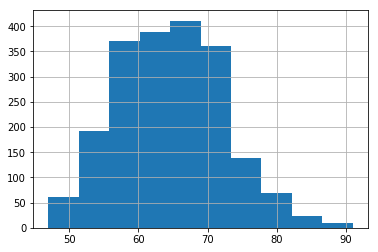

In [28]:
keepers.overall.hist()

In [29]:
lr = LinearRegression()

In [30]:
players.corr()

,unnamed:_0,id,age,overall,potential,special,international_reputation,weak_foot,skill_moves,jersey_number,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
unnamed:_0,1.000000,0.425566,-0.458961,-0.972700,-0.621687,-0.780564,-0.413665,-0.201558,-0.504384,0.206169,-0.487489,-0.362597,-0.460356,-0.705488,-0.441192,-0.501009,-0.496804,-0.451977,-0.575977,-0.696989,-0.138565,-0.158373,-0.235680,-0.830800,-0.053683,-0.559477,-0.226528,-0.450839,-0.334397,-0.496492,-0.453580,-0.330164,-0.430541,-0.513885,-0.385383,-0.789479,-0.297746,-0.257958,-0.220214,-0.044088,-0.050164,-0.056747,-0.045595,-0.044428
id,0.425566,1.000000,-0.736955,-0.426009,0.052053,-0.414793,-0.365180,-0.103190,-0.152041,0.182344,-0.277281,-0.169946,-0.288233,-0.315288,-0.277298,-0.149494,-0.307825,-0.327434,-0.315755,-0.285933,0.173195,0.173248,-0.036440,-0.415952,0.035525,-0.327636,-0.176311,-0.158896,-0.285786,-0.289826,-0.354708,-0.238507,-0.206827,-0.289062,-0.261517,-0.470480,-0.200288,-0.168401,-0.138797,-0.058565,-0.072715,-0.072152,-0.068762,-0.064585
age,-0.458961,-0.736955,1.000000,0.455509,-0.266447,0.410383,0.257815,0.090614,0.102558,-0.239774,0.263204,0.144203,0.344275,0.306159,0.244419,0.103602,0.258692,0.305848,0.304539,0.250561,-0.206653,-0.199765,-0.016755,0.454947,-0.092422,0.303636,0.185675,0.220672,0.358897,0.271537,0.396263,0.279857,0.187764,0.238707,0.248733,0.468578,0.232917,0.205382,0.177007,0.064566,0.072300,0.077956,0.075661,0.077470
overall,-0.972700,-0.426009,0.455509,1.000000,0.650382,0.795822,0.502080,0.209372,0.505221,-0.210406,0.496603,0.373079,0.466908,0.722720,0.452090,0.516363,0.503054,0.455875,0.585104,0.717933,0.150825,0.170155,0.244344,0.847739,0.059425,0.562960,0.228271,0.461417,0.341067,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365,0.039851,0.046732,0.053870,0.038649,0.042767
potential,-0.621687,0.052053,-0.266447,0.650382,1.000000,0.466060,0.368074,0.146798,0.414331,0.003727,0.273024,0.253522,0.224162,0.494950,0.268922,0.415786,0.307009,0.234962,0.359355,0.521081,0.228673,0.233661,0.208617,0.505267,0.116235,0.330896,0.067937,0.207872,0.051135,0.288501,0.156743,0.131119,0.274311,0.348356,0.229691,0.470064,0.145597,0.120832,0.103901,-0.023681,-0.020201,-0.016082,-0.023113,-0.034942
special,-0.780564,-0.414793,0.410383,0.795822,0.466060,1.000000,0.406641,0.257607,0.585897,-0.163340,0.754480,0.525550,0.202042,0.820301,0.614891,0.733118,0.756575,0.704692,0.747296,0.824903,0.354037,0.331981,0.511283,0.754148,0.349992,0.699103,0.211058,0.565079,0.120833,0.724630,0.422226,0.324087,0.653963,0.764618,0.513913,0.741967,0.267453,0.251760,0.220574,0.064357,0.068517,0.077767,0.064691,0.065512
international_reputation,-0.413665,-0.365180,0.257815,0.502080,0.368074,0.406641,1.000000,0.134457,0.271294,-0.071166,0.263117,0.223799,0.243389,0.366256,0.310106,0.277794,0.303458,0.276931,0.300089,0.369094,0.025968,0.024052,0.096901,0.454234,0.047210,0.311419,0.105714,0.118857,0.126454,0.276826,0.210173,0.143063,0.253360,0.312202,0.285083,0.441995,0.134482,0.106883,0.088296,-0.008858,-0.017208,-0.010725,-0.013889,-0.017697
weak_foot,-0.201558,-0.103190,0.090614,0.209372,0.146798,0.257607,0.134457,1.000000,0.263350,-0.027206,0.212149,0.288825,-0.013106,0.229903,0.289187,0.282982,0.270383,0.255213,0.173470,0.294572,0.149170,0.127792,0.218811,0.191669,0.161823,0.250295,0.007327,0.081852,-0.052364,0.285451,-0.021527,-0.093328,0.270168,0.289325,0.249097,0.226862,-0.101490,-0.121429,-0.133705,0.008340,0.001706,0.002552,0.005720,0.006515
skill_moves,-0.504384,-0.152041,0.102558,0.505221,0.414331,0.585897,0.271294,0.263350,1.000000,-0.030199,0.544803,0.583472,-0.104397,0.510854,0.585786,0.714952,0.622608,0.

In [31]:
X = players[['age', 'reactions', 'composure', 'potential', 'special']]
y = players.overall

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
lr.intercept_

-13.506270161104425

In [35]:
lr_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

lr_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
potential,0.588127
age,0.585631
reactions,0.166663
composure,0.062503
special,0.005470


In [36]:
lr.score(X_test, y_test)

0.9099882925210966

In [37]:
y_pred = lr.predict(X_test)  

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

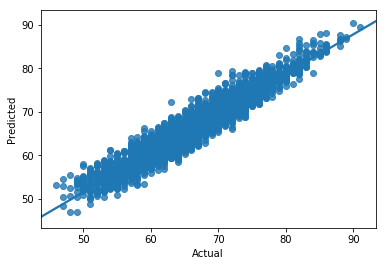

In [38]:
sns.regplot('Actual', 'Predicted', data=df)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 1.6257254369956622
Mean Squared Error: 4.266918519741912
Root Mean Squared Error: 2.065652081000552


In [40]:
#Let's run Ridge for feature selection

In [41]:
X = players[['age', 'potential', 'special', 'international_reputation', 'skill_moves', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle']]

y = players.overall

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
ss = StandardScaler()

In [44]:
ss.fit(X_train)

C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [46]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
preds = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Ridge RMSE: {}' .format(ridge_rmse))

Ridge RMSE: 1.8266124242200723


In [48]:
alphas = np.logspace(0,10,100)
ridge_cv = RidgeCV(alphas = alphas)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.26186e+00, ..., 7.92483e+09, 1.00000e+10]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [49]:
ridge_cv.alpha_

1.0

In [50]:
preds = ridge_cv.predict(X_test_scaled)
rmse_rcv = np.sqrt(mean_squared_error(y_test, preds))
print('Ridge RMSE: {}' .format(rmse_rcv))

Ridge RMSE: 1.8266124242181336


In [51]:
ridge_df = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

ridge_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
potential,2.976123
age,2.332083
special,2.329186
reactions,1.166701
ballcontrol,0.697545
composure,0.551272
skill_moves,0.474870
shortpassing,0.458918
headingaccuracy,0.413471
strength,0.271280


In [52]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
preds = lasso.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Lasso RMSE: {}' .format(rmse_rcv))

Lasso RMSE: 1.8266124242181336


In [53]:
lasso_df = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

lasso_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
reactions,2.055765
potential,1.411608
composure,1.128636
special,1.114002
age,0.461531
headingaccuracy,0.269070
shortpassing,0.018847
marking,0.000000
penalties,0.000000
shotpower,0.000000


KEEPERS

In [54]:
keepers.corr()

,unnamed:_0,id,age,overall,potential,special,international_reputation,weak_foot,skill_moves,jersey_number,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
unnamed:_0,1.000000,0.432705,-0.502454,-0.972798,-0.693148,-0.757110,-0.415457,-0.110328,NaN,0.254456,-0.117479,-0.308462,-0.097799,-0.254095,-0.326579,-0.282555,-0.159960,-0.153477,-0.253222,-0.325966,-0.429256,-0.434056,-0.402364,-0.835369,-0.139513,-0.123381,-0.426911,-0.320724,-0.352716,-0.318286,-0.277292,-0.379738,-0.344394,-0.409701,-0.277907,-0.526519,-0.193603,-0.091612,-0.071835,-0.915294,-0.895134,-0.760988,-0.907913,-0.918999
id,0.432705,1.000000,-0.746027,-0.435348,-0.023831,-0.469500,-0.337703,-0.070408,NaN,0.195238,-0.102413,-0.261731,-0.066655,-0.204885,-0.290382,-0.169489,-0.066708,-0.105265,-0.229641,-0.326361,-0.278385,-0.286020,-0.327042,-0.450696,-0.152423,-0.073729,-0.288647,-0.205209,-0.211647,-0.278721,-0.365760,-0.369460,-0.323963,-0.174981,-0.204111,-0.409782,-0.160751,-0.049284,-0.093957,-0.363183,-0.410119,-0.320939,-0.465444,-0.340888
age,-0.502454,-0.746027,1.000000,0.501949,-0.130970,0.502061,0.247774,0.011780,NaN,-0.263151,0.120988,0.253723,0.084260,0.141110,0.281862,0.186898,0.094333,0.162887,0.175959,0.263675,0.266758,0.289423,0.313958,0.524399,0.151618,0.052643,0.285156,0.229208,0.268761,0.264230,0.377798,0.356861,0.352759,0.236937,0.230143,0.440055,0.229070,0.041217,0.093257,0.404338,0.465520,0.399115,0.550143,0.393168
overall,-0.972798,-0.435348,0.501949,1.000000,0.714011,0.781988,0.491683,0.124583,NaN,-0.263517,0.124469,0.317965,0.106258,0.274974,0.335966,0.295731,0.166810,0.155161,0.273732,0.341724,0.450882,0.460927,0.417853,0.857489,0.149581,0.131820,0.429746,0.339520,0.360988,0.331578,0.275428,0.391692,0.352472,0.415866,0.281742,0.547686,0.204940,0.097113,0.079525,0.937871,0.918714,0.774512,0.935355,0.941000
potential,-0.693148,-0.023831,-0.130970,0.714011,1.000000,0.463656,0.415720,0.141966,NaN,-0.087627,0.038966,0.112859,0.029616,0.193215,0.118131,0.159894,0.082640,0.051228,0.168271,0.171522,0.253780,0.243663,0.223501,0.533197,0.046066,0.105760,0.276075,0.165675,0.177743,0.130995,0.053681,0.152174,0.086663,0.303085,0.131576,0.293141,0.042053,0.045225,-0.004174,0.711188,0.669206,0.546986,0.622077,0.715380
special,-0.757110,-0.469500,0.502061,0.781988,0.463656,1.000000,0.377091,0.136335,NaN,-0.258184,0.383118,0.574792,0.313584,0.499801,0.577432,0.530308,0.402695,0.360180,0.482982,0.557068,0.734989,0.736505,0.622177,0.744388,0.459238,0.318076,0.600626,0.571346,0.417130,0.600875,0.417214,0.616404,0.587456,0.430927,0.480616,0.541433,0.315658,0.332792,0.341272,0.722720,0.685534,0.663105,0.721367,0.732342
international_reputation,-0.415457,-0.337703,0.247774,0.491683,0.415720,0.377091,1.000000,0.081107,NaN,-0.120181,0.003016,0.050541,0.002496,0.228156,0.076257,0.104666,0.020665,0.039458,0.226535,0.190749,0.208293,0.223475,0.240993,0.403339,0.067577,0.082352,0.245215,0.164402,0.167402,0.081674,0.158044,0.177335,0.079190,0.244889,0.121614,0.318592,0.074364,-0.020970,-0.011483,0.457049,0.469756,0.362594,0.452800,0.443716
weak_foot,-0.110328,-0.070408,0.011780,0.124583,0.141966,0.136335,0.081107,1.000000,NaN,-0.056109,0.015604,0.029288,0.042952,0.093558,0.019179,0.060056,0.052896,0.025397,0.081137,0.124929,0.092177,0.104105,0.092394,0.107152,0.070716,0.050635,0.085074,0.064727,0.041859,0.032273,-0.009350,0.044711,0.029821,0.108860,0.045093,0.025639,0.034668,0.014686,0.026319,0.123379,0.112207,0.164214,0.104494,0.108345
skill_moves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jersey_number,0.254456,0.195238,-0.2

In [55]:
XKeeper = keepers[['age', 'reactions', 'gkdiving', 'gkhandling',
       'gkkicking', 'gkpositioning', 'gkreflexes']]
yKeeper = keepers.overall

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XKeeper, yKeeper)

In [57]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lr.intercept_

0.8725424086137252

In [59]:
lr_df = pd.DataFrame(lr.coef_, XKeeper.columns, columns=['Coefficient'])

lr_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
gkhandling,0.212917
gkdiving,0.212484
gkreflexes,0.210264
gkpositioning,0.208677
reactions,0.109372
gkkicking,0.049215
age,-0.002375


In [60]:
lr.score(X_test, y_test)

0.9981526080422451

In [61]:
y_pred = lr.predict(X_test)  

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

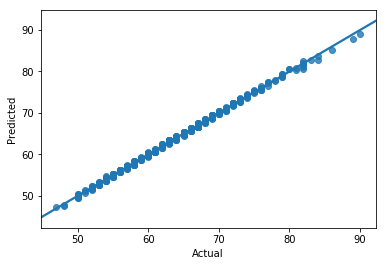

In [62]:
sns.regplot('Actual', 'Predicted', data=df)

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.26730190879002014
Mean Squared Error: 0.10309510645476747
Root Mean Squared Error: 0.3210842669063177


In [64]:
ss = StandardScaler()

In [65]:
ss.fit(X_train)

C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [67]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
preds = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Ridge RMSE: {}' .format(ridge_rmse))

Ridge RMSE: 0.3210924597942662


In [69]:
ridge_df = pd.DataFrame(ridge.coef_, XKeeper.columns, columns=['Coefficient'])

ridge_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
gkpositioning,1.818717
gkreflexes,1.725351
gkdiving,1.648506
gkhandling,1.623191
reactions,1.129635
gkkicking,0.378055
age,-0.012175


In [70]:
alphas = np.logspace(0,10,100)
ridge_cv = RidgeCV(alphas = alphas)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.26186e+00, ..., 7.92483e+09, 1.00000e+10]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [71]:
ridge_cv.alpha_

1.0

In [72]:
preds = ridge_cv.predict(X_test_scaled)
rmse_rcv = np.sqrt(mean_squared_error(y_test, preds))
print('Ridge CV RMSE: {}' .format(rmse_rcv))

Ridge CV RMSE: 0.32109245979403195


In [73]:
ridgeCV_df = pd.DataFrame(ridge_cv.coef_, XKeeper.columns, columns=['Coefficient'])

ridgeCV_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
gkpositioning,1.818717
gkreflexes,1.725351
gkdiving,1.648506
gkhandling,1.623191
reactions,1.129635
gkkicking,0.378055
age,-0.012175


In [74]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
preds = lasso.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('Lasso RMSE: {}' .format(rmse_rcv))

Lasso RMSE: 0.32109245979403195


In [75]:
lasso_df = pd.DataFrame(lasso.coef_, XKeeper.columns, columns=['Coefficient'])

lasso_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
gkpositioning,1.735064
gkreflexes,1.637155
gkdiving,1.526876
gkhandling,1.420195
reactions,0.735491
age,0.000000
gkkicking,0.000000


In [76]:
#KNN

In [77]:
X = players[['reactions', 'potential', 'special', 'composure', 'age', 'headingaccuracy', 'shortpassing']]
y = players.position

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [79]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [80]:
from sklearn.neighbors import KNeighborsClassifier  


classifier = KNeighborsClassifier(n_neighbors=44)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=44, p=2,
           weights='uniform')

In [81]:
y_pred = classifier.predict(X_test)  

In [82]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 46   3  14   0  66   0  13   0   2   0   0  39   0   1   0   0  15   0
    0   0   0  14   0   0   0  14]
 [  1 264   8   0  10   0  17   5   0   0   0   0   0   0   0   0   9   8
    0   0   0   0   0   0   0 135]
 [ 19  11  39   0  78   0  28   0   0   0   0  10   0   0   0   0  31   1
    2   0   0   9   0   0   0  34]
 [  0   1   1   0   4   0   1   0   0   0   0   3   0   0   0   0   0   0
    0   0   0   2   0   0   0   6]
 [ 31   3  33   0 194   0  32   0   4   2   0  17   0   0   0   0  19   0
    1   0   0  11   0   0   0  14]
 [  2   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  8  31  18   0  37   0  80   1   0   0   0  17   0   1   0   0  69   0
    1   0   0  17   0   0   0  57]
 [  0  90   3   0   2   0   4   6   0   0   0   0   0   0   0   0   5   4
    0   0   0   0   1   0   0  42]
 [ 12   1  11   0  31   0  12   0   2   0   0  14   0   0   0   0   7   0
    0   0   0   4   0   0   0   5]
 [  8   4   7   0  

C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [83]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

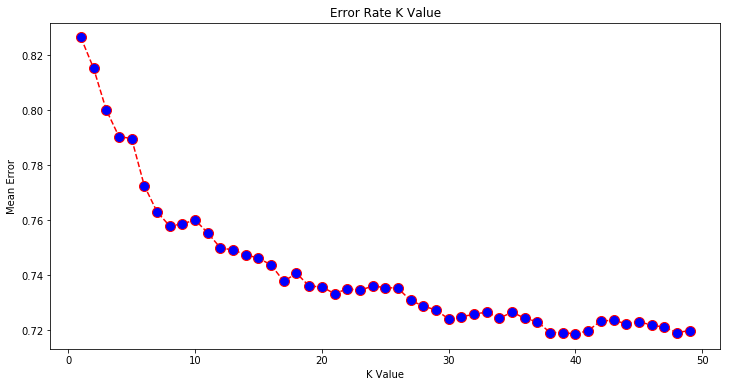

In [84]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [85]:
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
      players.loc[players.position == i , 'pos'] = 'Strikers' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
      players.loc[players.position == i , 'pos'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB','GK']:
      players.loc[players.position == i , 'pos'] = 'Defender' 

In [86]:
players.head()

,unnamed:_0,id,name,age,photo,nationality,flag,overall,potential,club,club_logo,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release_clause,pos
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Strikers
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Strikers
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Strikers
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Midfielder
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,Strikers


In [87]:
X = players[['age', 'reactions', 'composure', 'potential', 'special']]
y = players.pos

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [89]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Matt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [90]:
classifier = KNeighborsClassifier(n_neighbors=29)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

In [91]:
y_pred = classifier.predict(X_test)  

In [92]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 782  520  115]
 [ 255 1373  120]
 [ 276  411  179]]
              precision    recall  f1-score   support

    Defender       0.60      0.55      0.57      1417
  Midfielder       0.60      0.79      0.68      1748
    Strikers       0.43      0.21      0.28       866

   micro avg       0.58      0.58      0.58      4031
   macro avg       0.54      0.51      0.51      4031
weighted avg       0.56      0.58      0.56      4031



In [93]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

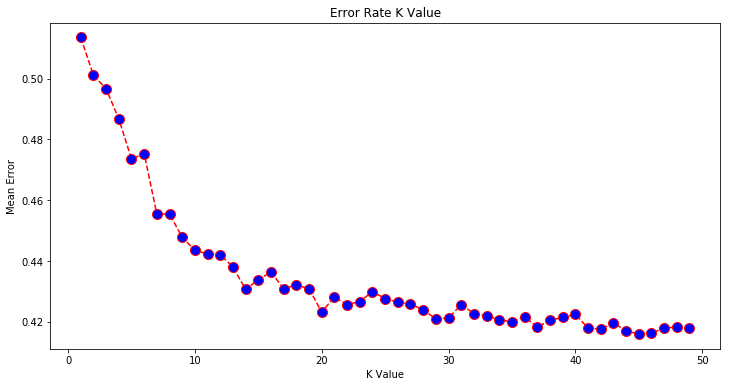

In [94]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')